> #### About:
> ### An algorithm for a logistics company that has to serve its customers by selecting the set of orders that will optimize the truck volume capacity as well as optimizing the shortest route

### We need to solve two interrelated phases in this project:  
__First phases__: Allocating and puting products in truck:  
__(i)__ Pallet Building Phase. All layers of products have to be placed on pallets.  
__(ii)__ Truck Loading Phase. All pallets have to placed in one
of the trucks.  
  
__Second phases__: Choosing the best routing for trucks to deliver to clients:  
__(i)__  
__(ii)__  

#### We have some constrains and here they are:  
__I Products__  
1- Total products volume and Truck Capacity  
2- Total products wight and Truck Capacity   
3- Products Stackabiliy (or load bearing)  
4- Maximum number of Products in the truck  
5- Products orders serving same truck destination zone  
6- Stability(verticala and static Stability)  
   
__II Truck Route__  
1- Minimum Route  
2- Minimum Time  


* Pallet Buildin:
  - (i) Priority Constraint.  
  - (ii) Stability Constraint.  
  - (iii) Stackability Constraint.
* Truck Loading  
* Objective

The problem begins when a depot sends a set of orders for the upcoming  
days 𝑑 ∈ 1, . . . , 𝐷 . For each day 𝑑, the order consists of a list of  
products 𝑗, 𝑗 ∈ 1, . . . , 𝐽 , with their required number of items for this day, 𝑎𝑗𝑑. The products have to be served that day, or before, but not later. Each product is defined by its dimensions  
(𝑥𝑗, 𝑦 𝑗, 𝑧 𝑗), its weight 𝑤𝑗, and its possible rotations (𝑟𝑥𝑗, 𝑟𝑦 𝑗, 𝑟𝑧 𝑗),  
where 𝑟𝑥𝑗 = 1 if the dimension 𝑥𝑗 of the product can be upward. 

In [1]:
import pandas as pd
import numpy as np
from rectpack import newPacker
import rectpack.packer as packer
import matplotlib.pyplot as plt

### Variables meanings:

n_car_1: number of cartons of diemension 1  
n_car_2: number of cartons of diemension 2  
  .  
n_car_n: number of cartons of diemension n  

 ---
 
car_1: dimensions of carton_1  
car_2: dimensions of carton_2  
  .  
car_n: dimensions of carton_n  

In [2]:
# Cartons Count


#Cartons dimensinos
#asuming that the inventory has 3 types of cartons with dimensions of 50*50, 50*60 cm, and 40*80

bx = 0 #buffer for acrton (if needed)
by = 0 #buffer for acrton (if needed)
cart_1 = [50 + bx, 50 + by]

bx = 0
by = 0
cart_2 = [50 + bx, 60 + by]

bx = 0
by = 0
cart_3 = [40 + bx, 80 + by]
"""
 .
bx = 0
by = 0
cart_n = [n_x + bx, n_y + by]"""



# Number of Cartons
n_cart_1 = 14
n_cart_2 = 10 
rectangles = [cart_1 for i in range(n_cart_1)] + [cart_2 for i in range(n_cart_2)]


# Trucks dimensions
"""
         length	width	height
Truck_1 = 230 	170 	165
Truck_2 = 200 	100 	115
"""
# *Taking length and width only for now.

truck_1 = [(230, 170)] 
truck_2 = [(200, 100)] 


In [3]:
# Function Loader

#trucks: number of availble trucks' dimensions

def loader(cart_1, cart_2, n_cart_1, n_cart_2, trucks): 
    
    #laod the cartons of type cart_1 and cart_2
    rectangles = [cart_1 for i in range(n_cart_1)] + [cart_2 for i in range(n_cart_2)]
    
    # Build the Packer
    pack = newPacker(mode = packer.PackingMode.Offline, bin_algo = packer.PackingBin.Global,
                     rotation=True)

    # Add the rectangles to packing queue
    for r in rectangles:
        pack.add_rect(*r)

    # Add the trucks where the cartons will be placed
    for t in trucks:
        pack.add_bin(*t)

    # Start packing
    pack.pack()
    
    # Full rectangle list
    all_rects = pack.rect_list()

    # cartons with dimensions
    all_cartons = [sorted([r[3], r[4]]) for r in all_rects]

    # Count number of cartons that been loaded in the truck
    cart_1, cart_2 = all_cartons.count(cart_1), all_cartons.count(cart_2)
    print("{:,}/{:,} cartons 50 x 50 (cm) | {:,}/{:,} cartons 50 x 60" +
          "(cm)".format(cart_1, n_cart_1, cart_2, n_cart_2, ))
    
    return all_rects, all_cartons

In [4]:
def plot_solution(all_rects, cart_1, cart_2):
    # Plot
    plt.figure(figsize=(15,9))
    # Loop all rect
    for rect in all_rects:
        b, x, y, w, h, rid = rect
        x1, x2, x3, x4, x5 = x, x+w, x+w, x, x
        y1, y2, y3, y4, y5 = y, y, y+h, y+h,y

        # Carton type
        if [w, h] == cart_1:
            color = '--r'
        else:
            color = '--b'

        plt.plot([x1,x2,x3,x4,x5],[y1,y2,y3,y4,y5], color)
    
    plt.show()

{:,}/{:,} cartons 50 x 50 (cm) | {:,}/{:,} cartons 50 x 60(cm)


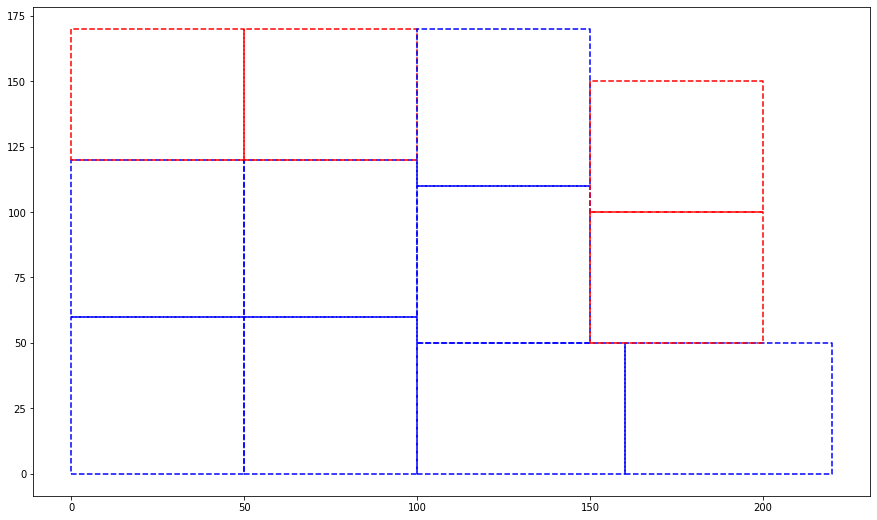

In [5]:
# Test with truck_1(230*170 cm)

n_cart_1 = 5
n_cart_2 = 8
n_cart_3= 5
all_rects, all_cartons = loader(cart_1, cart_2, n_cart_1, n_cart_2, truck_1)
plot_solution(all_rects, cart_1, cart_2)

{:,}/{:,} cartons 50 x 50 (cm) | {:,}/{:,} cartons 50 x 60(cm)


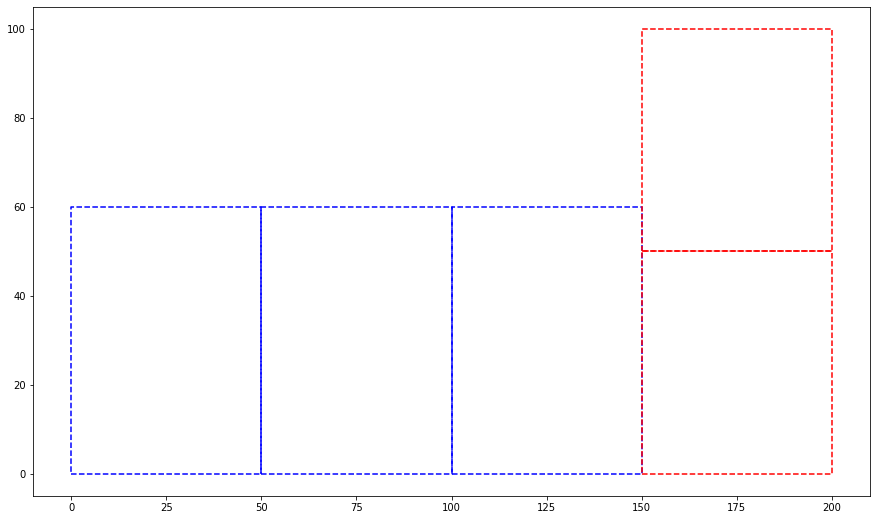

In [6]:
# Test with truck_2 (200*100 cm)

n_cart_1 = 13
n_cart_2 = 8
all_rects, all_cartons = loader(cart_1, cart_2, n_cart_1, n_cart_2, truck_2)
plot_solution(all_rects, cart_1, cart_2)

The solution needs investigation specially it exceeds the dimension of the truck for test 1

to be continued...